# Heart Disease Prediction Model

## Imporing Libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Analysis  

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
data.duplicated().sum()

1

In [8]:
data.shape

(303, 14)

### Checking Null Values 

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
shape=data.shape
print('Number of Rows : ',shape[0])
print('Number of Columns : ',shape[1])

Number of Rows :  303
Number of Columns :  14


In [13]:
sns.set(style='whitegrid', context='notebook')
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [14]:
cm = np.corrcoef(data[cols].values.T)
cm

array([[ 1.        , -0.0984466 , -0.06865302,  0.27935091,  0.21367796,
         0.12130765, -0.1162109 , -0.39852194,  0.09680083,  0.21001257,
        -0.16881424,  0.27632624,  0.06800138, -0.22543872],
       [-0.0984466 ,  1.        , -0.04935288, -0.05676882, -0.19791217,
         0.04503179, -0.05819627, -0.04401991,  0.14166381,  0.09609288,
        -0.03071057,  0.11826141,  0.2100411 , -0.28093658],
       [-0.06865302, -0.04935288,  1.        ,  0.04760776, -0.07690439,
         0.09444403,  0.04442059,  0.29576212, -0.39428027, -0.14923016,
         0.11971659, -0.18105303, -0.16173557,  0.43379826],
       [ 0.27935091, -0.05676882,  0.04760776,  1.        ,  0.12317421,
         0.17753054, -0.11410279, -0.04669773,  0.06761612,  0.19321647,
        -0.12147458,  0.10138899,  0.06220989, -0.14493113],
       [ 0.21367796, -0.19791217, -0.07690439,  0.12317421,  1.        ,
         0.0132936 , -0.15104008, -0.00993984,  0.06702278,  0.05395192,
        -0.00403777,  0.07

# Data Visualization 

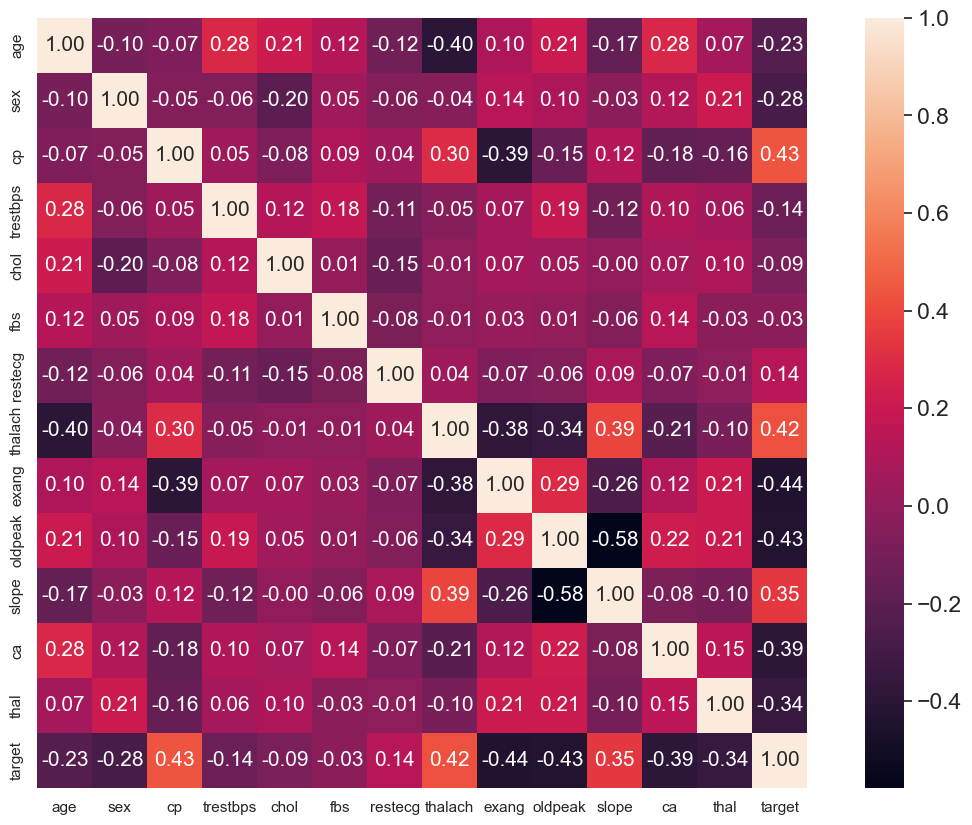

In [15]:
f, ax = plt.subplots(figsize=(15, 10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()

In [16]:
X=data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', ]].values
y=data[['target']].values

#### Histogram 

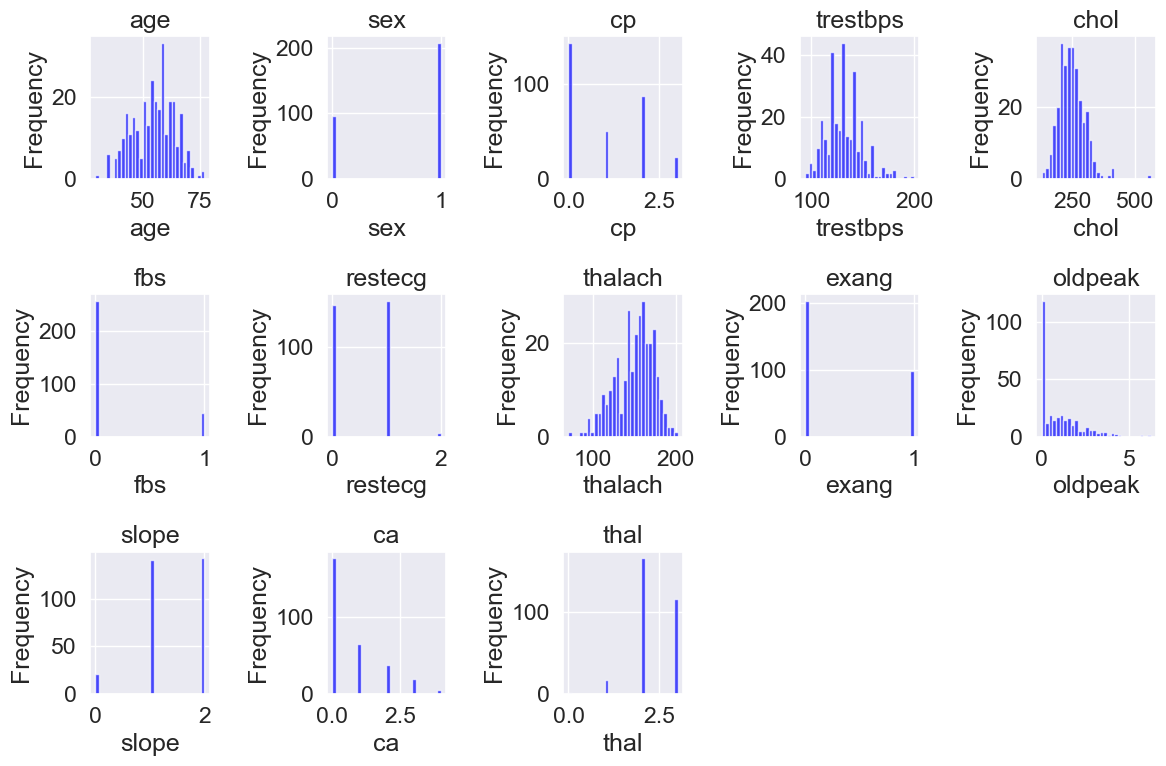

In [17]:
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
    plt.subplot(3, 5, i + 1)
    plt.hist(X[:, i], bins=30, color='blue', alpha=0.7)
    plt.title(data.columns[i])
    plt.xlabel(data.columns[i])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Scatter Plot

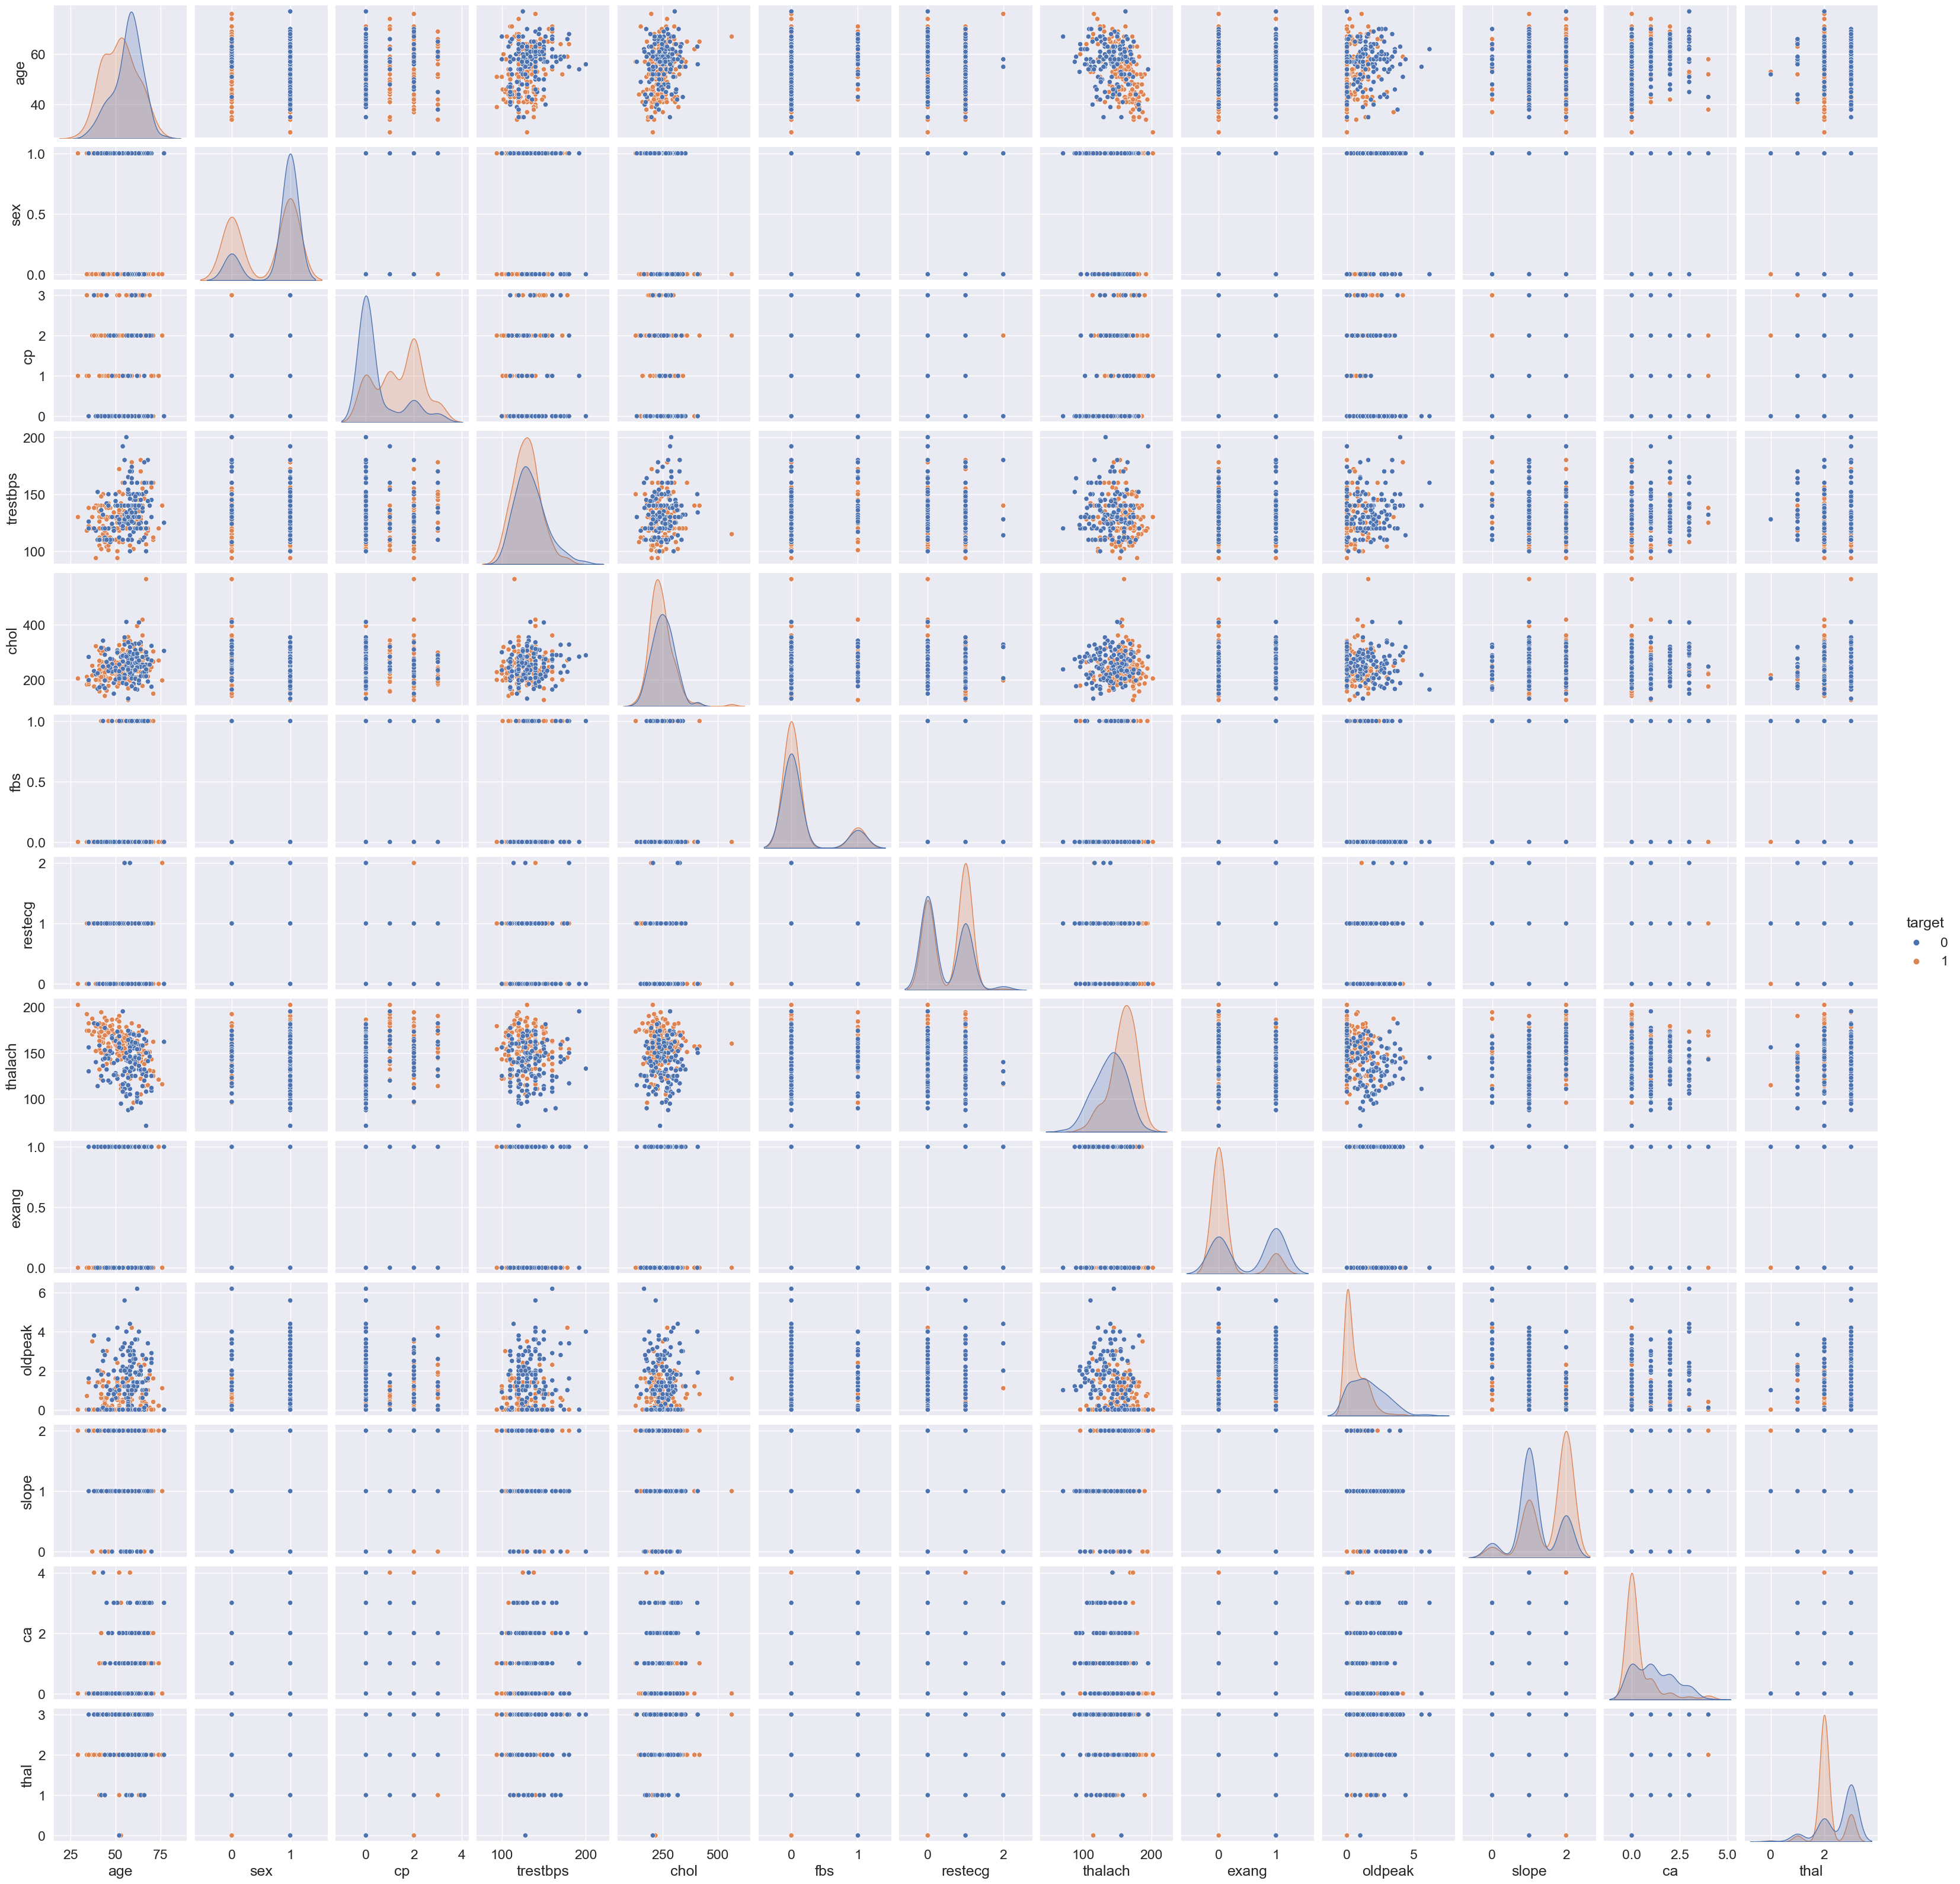

In [18]:
sns.pairplot(data[cols], hue='target', height=2.5)
plt.show()

#### Bar Plot 

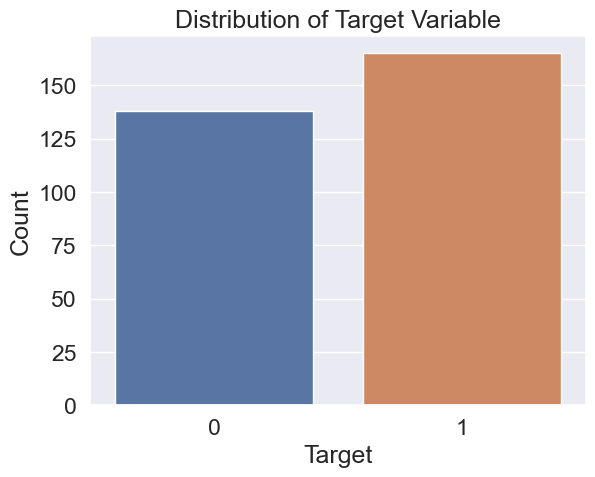

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x='target', data=data)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

# Application of ML Algorithms  

## Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
model = LogisticRegression( C=200, penalty='l1',solver='liblinear')

model.fit(X_train, y_train)

LogisticRegression(C=200, penalty='l1', solver='liblinear')

In [22]:
model.score(X_train, y_train)

0.8679245283018868

In [23]:
print ('Training Accuracy: %.2f'%model.score(X_train,y_train))
print ('Test Accuracy: %.2f' % model.score(X_test,y_test))
        

Training Accuracy: 0.87
Test Accuracy: 0.81


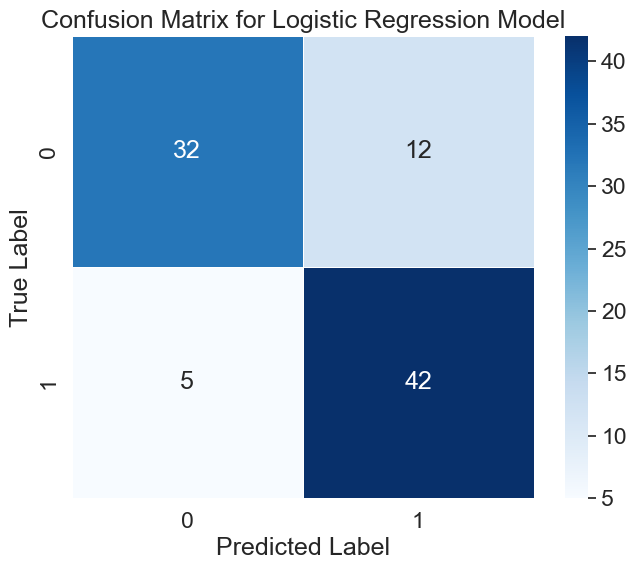

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
model = LogisticRegression(C=200, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


## Random forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train, y_train.ravel())  


RandomForestClassifier(random_state=0)

In [26]:
rf_train_accuracy = rf_model.score(X_train, y_train)
print('Random Forest Training Accuracy: %.2f' % rf_train_accuracy)


Random Forest Training Accuracy: 1.00


In [27]:
rf_test_accuracy = rf_model.score(X_test, y_test)
print('Random Forest Test Accuracy: %.2f' % rf_test_accuracy)


Random Forest Test Accuracy: 0.84


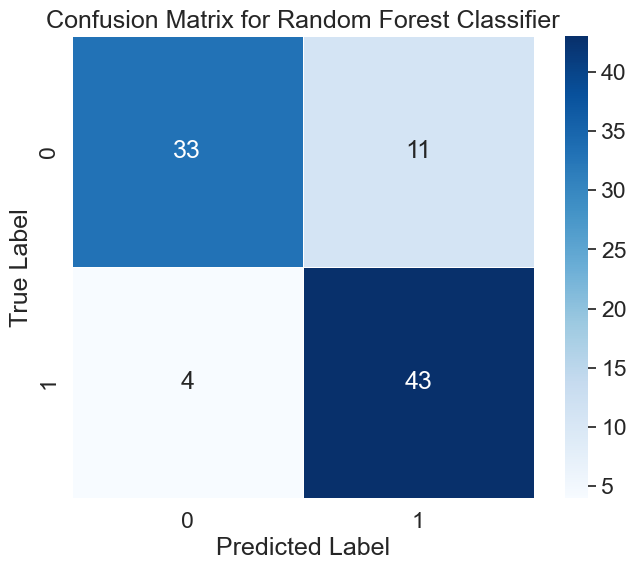

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train.ravel())

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()


### Prediction of Heart Disease on Test Data provided by user

In [30]:
rf_model = RandomForestClassifier(n_estimators=20, random_state=0)
rf_model.fit(X_train, y_train.ravel())  


RandomForestClassifier(n_estimators=20, random_state=0)

In [31]:
def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    # Prepare input data as a NumPy array
    new_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Use the trained model to make predictions
    prediction = rf_model.predict(new_data)

    # Print the prediction result
    if prediction[0] == 1:
        return "The model predicts that the person has heart disease."
    else:
        return "The model predicts that the person does not have heart disease."

# Example usage:
age = 45
sex = 1
cp = 2
trestbps = 140
chol = 260
fbs = 0
restecg = 1
thalach = 150
exang = 0
oldpeak = 2.5
slope = 1
ca = 0
thal = 2

result = predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal)
print(result)


The model predicts that the person does not have heart disease.


## KNN

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

knn_model.fit(X_train, y_train.ravel())  

KNeighborsClassifier()

In [33]:
knn_test_accuracy = knn_model.score(X_test, y_test)
print('KNN Test Accuracy: %.2f' % knn_test_accuracy)


KNN Test Accuracy: 0.67


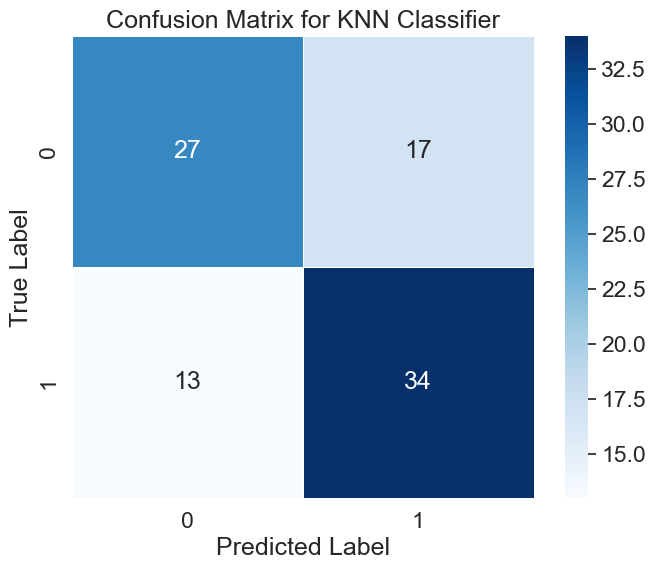

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Train the KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.ravel())

# Predictions on the test set
y_pred = knn_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


## Decision Tree

In [35]:
dt_model = DecisionTreeClassifier(random_state=0)  

dt_model.fit(X_train, y_train.ravel())  

DecisionTreeClassifier(random_state=0)

In [36]:
dt_train_accuracy = dt_model.score(X_train, y_train)
print('Decision Tree Training Accuracy: %.2f' % dt_train_accuracy)


Decision Tree Training Accuracy: 1.00


In [37]:
dt_test_accuracy = dt_model.score(X_test, y_test)
print('Decision Tree Test Accuracy: %.2f' % dt_test_accuracy)


Decision Tree Test Accuracy: 0.75


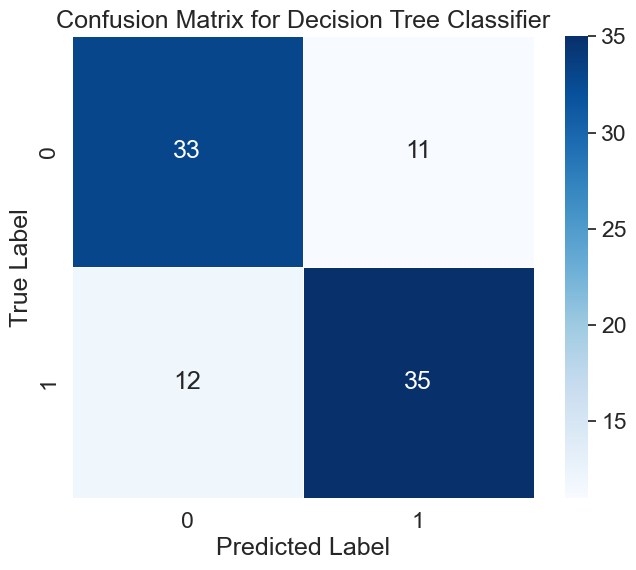

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train.ravel())

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()


## SVM

In [39]:
svm_model = SVC(kernel='linear', C=1.0, random_state=0)  

svm_model.fit(X_train, y_train.ravel()) 

SVC(kernel='linear', random_state=0)

In [40]:
svm_train_accuracy = svm_model.score(X_train, y_train)
print('SVM Training Accuracy: %.2f' % svm_train_accuracy)


SVM Training Accuracy: 0.85


In [41]:
svm_test_accuracy = svm_model.score(X_test, y_test)
print('SVM Test Accuracy: %.2f' % svm_test_accuracy)


SVM Test Accuracy: 0.81


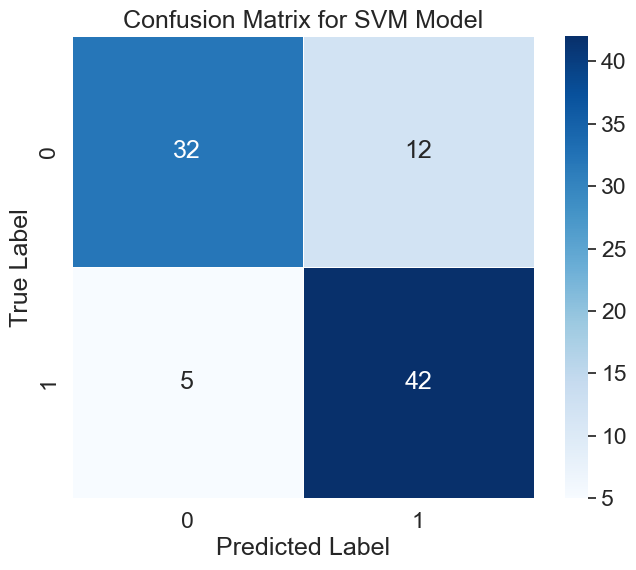

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1.0, random_state=0)
svm_model.fit(X_train, y_train.ravel())

# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()


## Best Algorithm for Model 

Random Forest Training Accuracy: 1.00
Random Forest Test Accuracy: 0.84


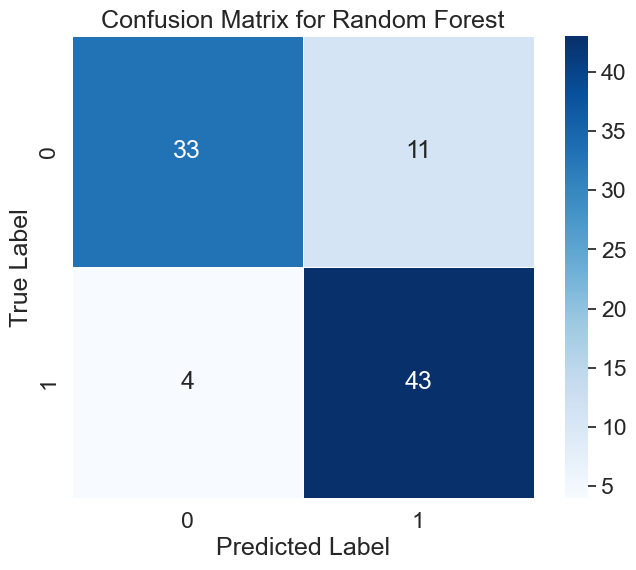

In [43]:

def train_model(model_name):
    X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
              'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
    y = data[['target']].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    if model_name == 'Logistic Regression':
        model = LogisticRegression(C=200, penalty='l1', solver='liblinear')
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=0)
    elif model_name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5)
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=0)
    elif model_name == 'SVM':
        model = SVC(kernel='linear', C=1.0, random_state=0)
    else:
        raise ValueError("Invalid model name. Please choose from: 'Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'SVM'")

    model.fit(X_train, y_train)

    # Training and test accuracy
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    return model, train_accuracy, test_accuracy, cm

# Example usage:
selected_model = 'Random Forest'  # Change this to the desired model name
trained_model, train_acc, test_acc, confusion_mat = train_model(selected_model)

print(f"{selected_model} Training Accuracy: {train_acc:.2f}")
print(f"{selected_model} Test Accuracy: {test_acc:.2f}")

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for {selected_model}')
plt.show()
